# 04-Logistic Regression: Tutorial

## Jupyter notebook 간단 사용법
- 위에 셀 추가 : 셀 왼쪽 부분 클릭 후, 키보드 'a'키 
- 아래에 셀 추가 : 셀 왼쪽 부분 클릭 후, 키보드 'b'키
- 셀 삭제 : 셀 왼쪽 부분 클릭 후, 키보드 'd'키 두번
- 셀 유형 변경: 코드 모드 (esc + y), 마크 다운 모드 (esc + m)
- 특정 셀 실행 : ctrl + enter
- 주석 처리 : 원하는 코드 드래그 후 , ctrl + /
- 주석 입력 : #주석 기입 or '''주석기입'''
- 쥬피터 노트북 저장 : ctrl + s

<img src='https://github.com/hansam95/LG-Elec-Day1/blob/main/images/logistic_image1.PNG?raw=1' width='800'></img>

## 모듈 불러오기

- Numpy : https://numpy.org/  
- Pandas : https://pandas.pydata.org/  
- Matplotlib : https://matplotlib.org/  
- Scikit-learn : https://scikit-learn.org/stable/

In [ ]:
# 실습용 데이터 패키지
from sklearn.datasets import load_breast_cancer

# 데이터 전처리 패키지
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 기계학습 모델 구축 및 평가 패키지
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, recall_score, precision_score

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

## 데이터 불러오기

In [ ]:
# 데이터셋 로드
breast_cancer = load_breast_cancer()

### X변수 및 Y변수 확인

In [ ]:
print(breast_cancer.target_names) ## class {"0":'malignant',"1":"benign"}

['malignant' 'benign']


In [ ]:
# 현재 데이터는 malignant = 0, benign = 1로 처리되어 있는 상황
breast_cancer.target[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1])

In [ ]:
# P(Y=1) : 유방암일 확률 , P(Y=0) : 유방암이 아닐 확률로 매칭하기 위해 malignant = 1, benign = 0으로 처리
breast_cancer.target = np.where(breast_cancer.target==0, 1, 0) ## np.where() 조건문

https://numpy.org/doc/stable/reference/generated/numpy.where.html

In [ ]:
breast_cancer.target[:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0])

In [ ]:
# Data Shape 확인
print('input X shape=>',breast_cancer.data.shape)
print('target Y shape =>',breast_cancer.target.shape)

input X shape=> (569, 30)
target Y shape => (569,)


In [ ]:
malignant = breast_cancer.data[breast_cancer.target==1]
benign = breast_cancer.data[breast_cancer.target==0]

print('malignant(악성) =>',malignant.shape)
print('benign(양성) =>',benign.shape)

malignant(악성) => (212, 30)
benign(양성) => (357, 30)


In [ ]:
for i, name in enumerate(breast_cancer.feature_names):
    print(f'{i+1} : {name}')

1 : mean radius
2 : mean texture
3 : mean perimeter
4 : mean area
5 : mean smoothness
6 : mean compactness
7 : mean concavity
8 : mean concave points
9 : mean symmetry
10 : mean fractal dimension
11 : radius error
12 : texture error
13 : perimeter error
14 : area error
15 : smoothness error
16 : compactness error
17 : concavity error
18 : concave points error
19 : symmetry error
20 : fractal dimension error
21 : worst radius
22 : worst texture
23 : worst perimeter
24 : worst area
25 : worst smoothness
26 : worst compactness
27 : worst concavity
28 : worst concave points
29 : worst symmetry
30 : worst fractal dimension


### 변수별 target y 값 분포 확인

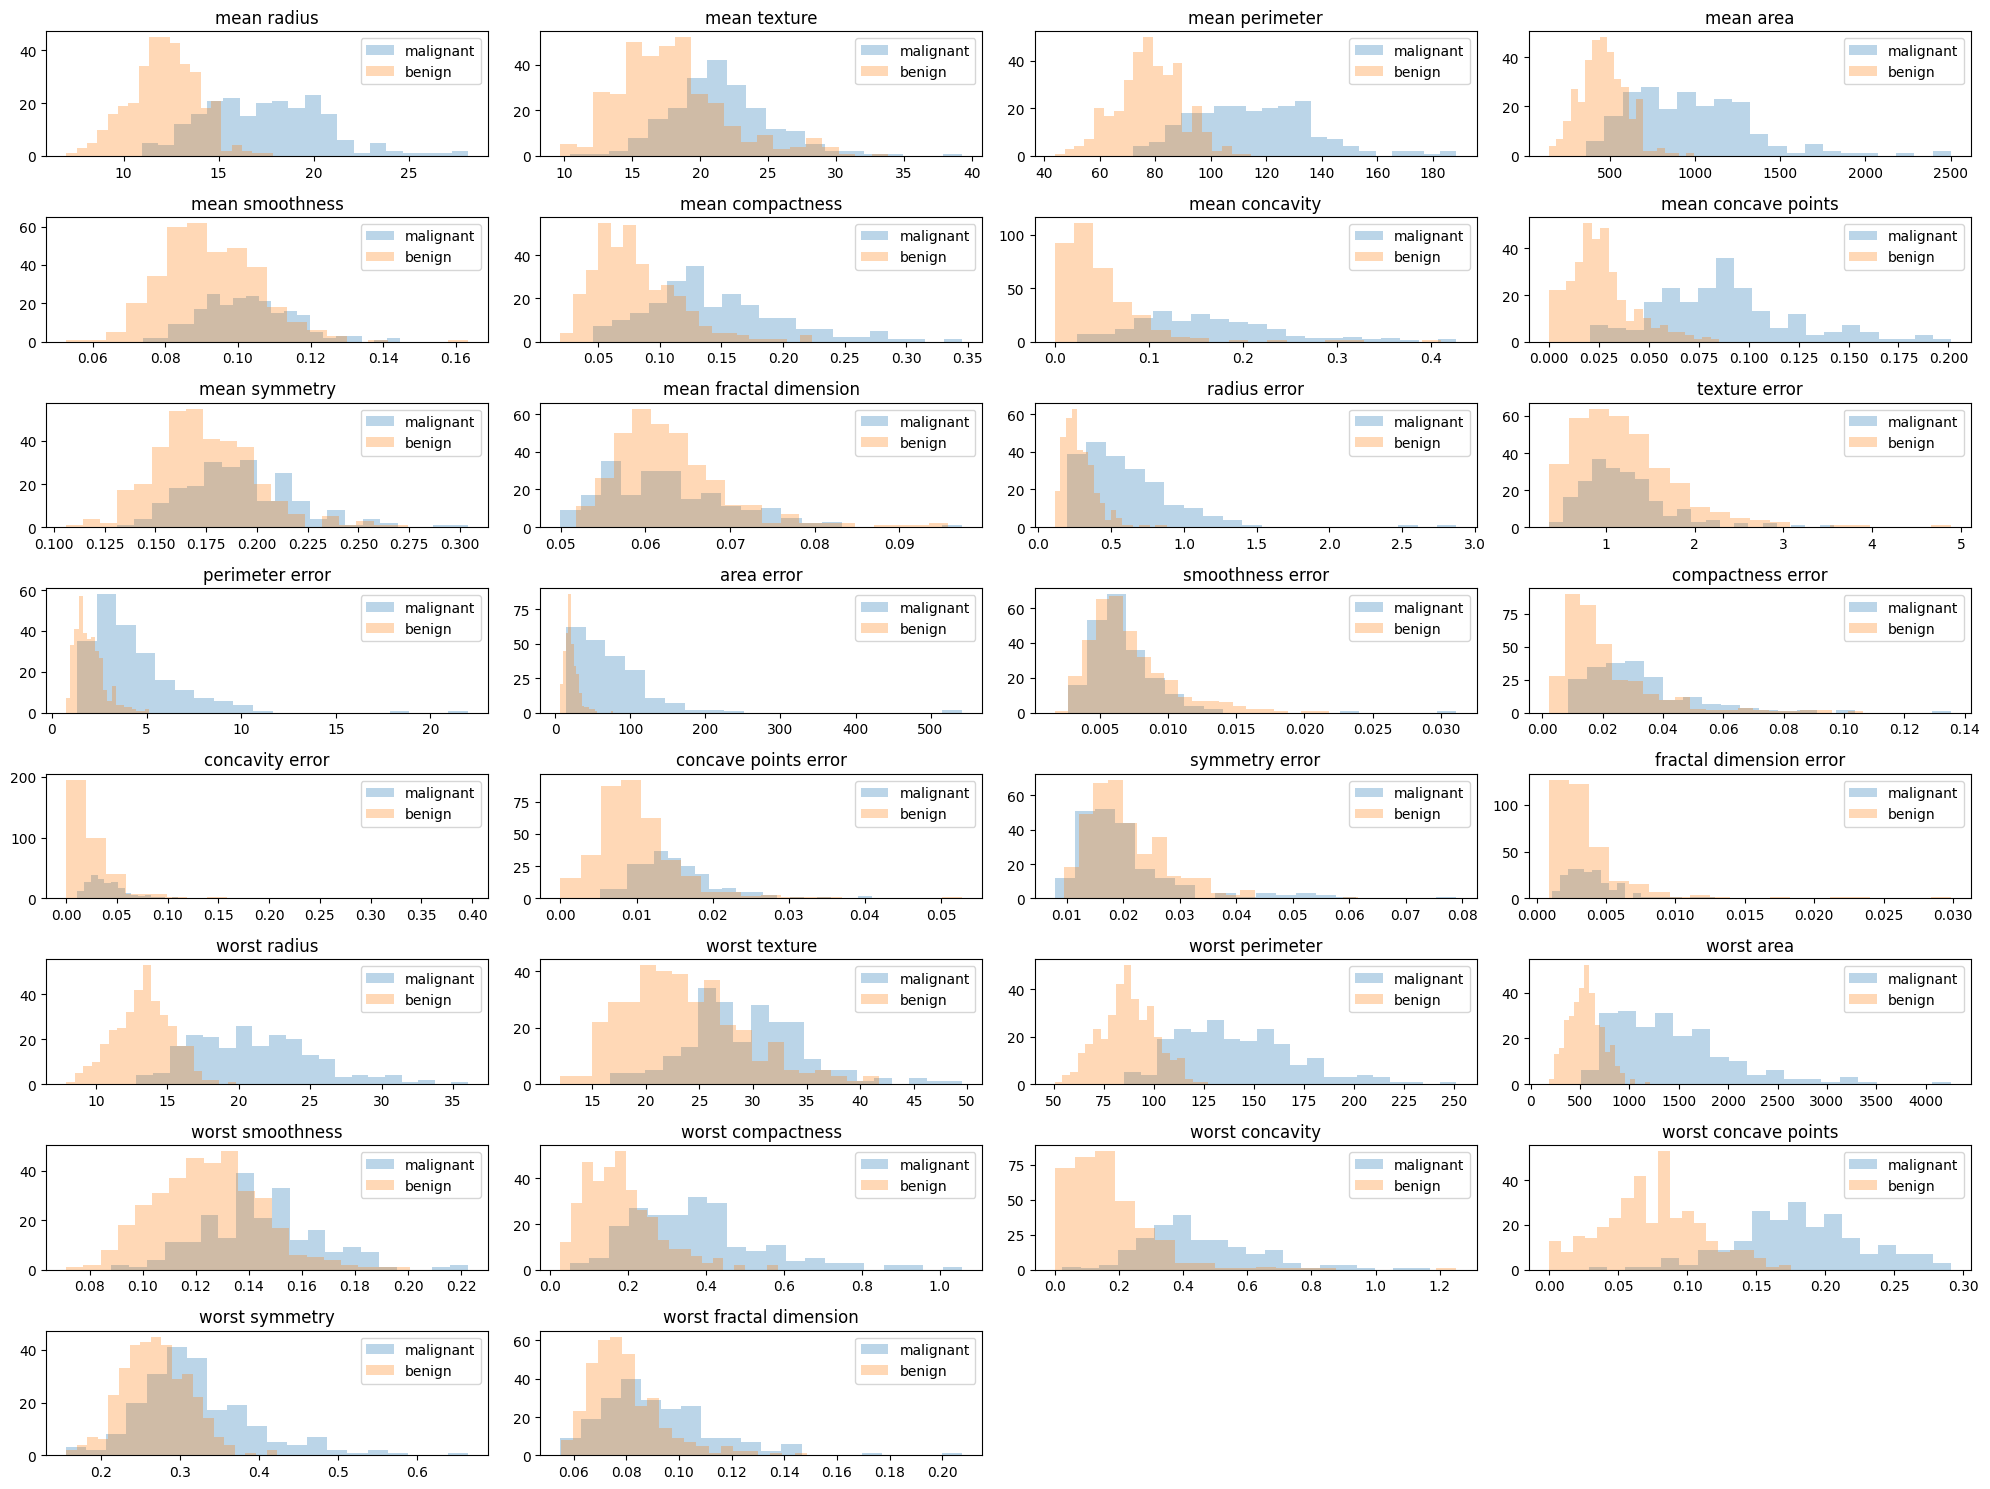

In [ ]:
plt.figure(figsize=[20,15])

for i in range(len(breast_cancer.feature_names)):
    plt.subplot(8,4,i+1) # 32개의 그래프 중 i번째 그래프 그리기
    plt.hist(malignant[:, i],bins=20, alpha=0.3) # 막대 너비 = 전체 구간을 bins=20으로 나누어 준 너비, alpha 는 투명도(0~1)를 조절
    plt.hist(benign[:, i], bins=20 ,alpha=0.3)
    plt.title(breast_cancer.feature_names[i])
    plt.legend(breast_cancer.target_names)
    plt.tight_layout()

## 데이터 전처리하기

In [ ]:
# Train set/ Test set 나누기
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data,
                                                   breast_cancer.target,
                                                   test_size=0.3,
                                                   random_state=2021)
# 데이터 컬럼 단위 정규화 하기
normalizer = StandardScaler() 
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

## 로지스틱 회귀 모델 구축하기

### 모델 학습하기

In [ ]:
# model 불러오기
model = LogisticRegression()

# model 학습시키기
model.fit(X_train, y_train)

LogisticRegression()

### $\beta$ 확인하기

<img src='https://github.com/hansam95/LG-Elec-Day1/blob/main/images/logistic_image2.PNG?raw=1' width='800'></img>

In [ ]:
# 데이터 컬럼에 따른 beta, exp(beta) 체크
column_name = ["const"] + breast_cancer.feature_names.tolist()
beta = np.concatenate([model.intercept_,model.coef_.reshape(-1)]).round(2) # round(2) 소수점 둘째짜리까지 반올림
odds = np.exp(beta).round(2) # round(2) 소수점 둘째짜리까지 반올림
interpret = np.where(beta>0,'risky','protective') # np.where() 조건문 

# beta 해석 정리
beta_analysis = pd.DataFrame(np.c_[beta,odds,interpret],index=column_name,columns=['beta','exp(beta)','interpret'])
beta_analysis

,beta,exp(beta),interpret
const,-0.42,0.66,protective
mean radius,0.54,1.72,risky
mean texture,0.92,2.51,risky
mean perimeter,0.55,1.73,risky
mean area,0.56,1.75,risky
mean smoothness,0.13,1.14,risky
mean compactness,-0.48,0.62,protective
mean concavity,0.93,2.53,risky
mean concave points,0.72,2.05,risky
mean symmetry,0.23,1.26,risky


### Test data 예측하기

<img src='https://github.com/hansam95/LG-Elec-Day1/blob/main/images/logistic_image3.PNG?raw=1' width='800'></img>

In [ ]:
# X_test에 대한 P(Y=0) 예측 확률값과 P(Y=1) 예측 확률값 - 패키지 이용
model.predict_proba(X_test)[:10]

array([[9.99587046e-01, 4.12953680e-04],
       [9.99985165e-01, 1.48350838e-05],
       [9.92817867e-01, 7.18213277e-03],
       [2.53352894e-13, 1.00000000e+00],
       [9.99986549e-01, 1.34505123e-05],
       [9.81298434e-02, 9.01870157e-01],
       [9.80024204e-07, 9.99999020e-01],
       [9.99932732e-01, 6.72677815e-05],
       [8.15117335e-05, 9.99918488e-01],
       [9.99995214e-01, 4.78559272e-06]])

In [ ]:
# X_test에 대한 P(Y=0) 예측 확률값과 P(Y=1) 예측 확률값 - 직접 계산

## beta 곱하기 X 계산 (np.c_ :상수항 파트)
Xbeta = np.matmul(np.c_[np.ones(X_test.shape[0]),X_test],beta.reshape(-1,1))
## P(Y=1) 계산
P_1 = 1 / (1+np.exp(-Xbeta))

## 패키지와 직접 계산 결과 비교
pd.DataFrame(np.concatenate([P_1,model.predict_proba(X_test)[:,1].reshape(-1,1)],axis=1),columns=['직접','패키지'])

,직접,패키지
0,0.000409,0.000413
1,0.000014,0.000015
2,0.007251,0.007182
3,1.000000,1.000000
4,0.000013,0.000013
...,...,...
166,0.000223,0.000225
167,0.000090,0.000089
168,0.008879,0.008804
169,0.168902,0.169033


### 성능 평가하기

#### Cut off 값을 변화하면서 Accuracy 성능 관찰

<img src='https://github.com/hansam95/LG-Elec-Day1/blob/main/images/logistic_image4.PNG?raw=1' width='800'></img>

- 민감도 : 실제 질병을 가지고 있는 환자 중 모델이 환자로 잘 분류한 비율
- 정밀도 : 모델이 환자라고 분류한 경우 중 실제 환자인 비율

In [ ]:
# Cut off 값을 변화하면서 Accuracy 성능 관찰
probs = model.predict_proba(X_test)[:, 1] ## [:,1]은 두번째 컬럼을 indexing 한다는 뜻

Cut_off = np.linspace(0,1,11)
for cutoff in Cut_off:
    y_pred = np.where(P_1.reshape(-1)>=cutoff,1,0) # 확률값이 cuf off보다 크면 1(유방암), 아니면 0(유방암x)
    acc = accuracy_score(y_true = y_test, y_pred =y_pred) ## 정확도
    recall = recall_score(y_true = y_test, y_pred =y_pred) ## 민감도
    precision = precision_score(y_true = y_test, y_pred =y_pred) ## 정밀도
    
    print(f"정확도:{acc:0.2f}",f"민감도:{recall:0.2f}",f"정밀도:{precision:0.2f}",f"cut off:{cutoff:0.2f}", sep='  |  ')  

정확도:0.37  |  민감도:1.00  |  정밀도:0.37  |  cut off:0.00
정확도:0.94  |  민감도:0.97  |  정밀도:0.87  |  cut off:0.10
정확도:0.95  |  민감도:0.97  |  정밀도:0.91  |  cut off:0.20
정확도:0.96  |  민감도:0.95  |  정밀도:0.94  |  cut off:0.30
정확도:0.96  |  민감도:0.94  |  정밀도:0.95  |  cut off:0.40
정확도:0.97  |  민감도:0.94  |  정밀도:0.98  |  cut off:0.50
정확도:0.96  |  민감도:0.92  |  정밀도:0.98  |  cut off:0.60
정확도:0.96  |  민감도:0.92  |  정밀도:0.98  |  cut off:0.70
정확도:0.96  |  민감도:0.91  |  정밀도:1.00  |  cut off:0.80
정확도:0.95  |  민감도:0.88  |  정밀도:1.00  |  cut off:0.90
정확도:0.63  |  민감도:0.00  |  정밀도:0.00  |  cut off:1.00


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Roc curve 그리기

<img src='https://github.com/hansam95/LG-Elec-Day1/blob/main/images/logistic_image5.PNG?raw=1' width='800'></img>

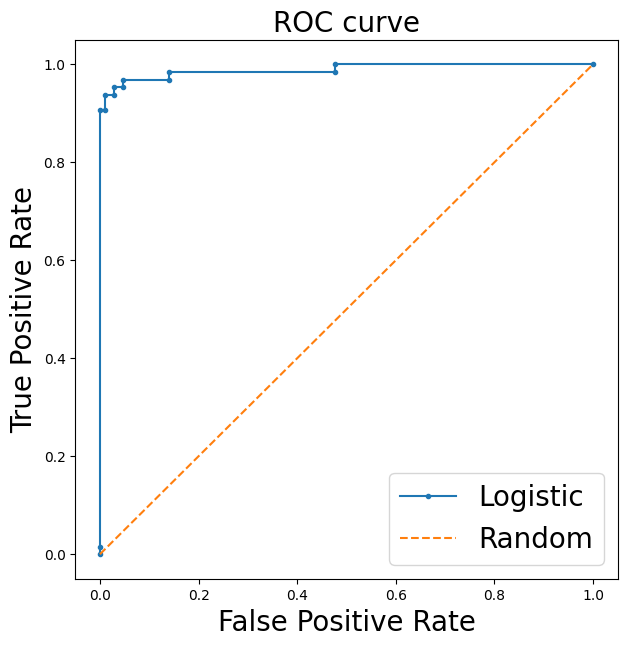

In [ ]:
# Roc curve X 축, Y축 추출
model_fpr, model_tpr, threshold1 = roc_curve(y_test, probs)
random_fpr, random_tpr, threshold2 = roc_curve(y_test, [0 for i in range(X_test.__len__())])

# plot the roc curve for the model and random
plt.figure(figsize=(7, 7))
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')

# axis labels
plt.xlabel('False Positive Rate',size=20)
plt.ylabel('True Positive Rate',size=20)
 
# show the legend
plt.legend(fontsize=20)
 
# show the plot
plt.title("ROC curve",size=20)
plt.show()

# EOD